# Implement the KNN algorithm

- Your Name:郭凯宇
- Your ID:2020141470135

In [49]:
import numpy as np
from matplotlib import pyplot as plt

new shape of train x:(3, 240)
new shape of test x:(3, 60)


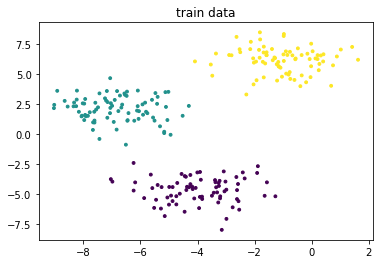

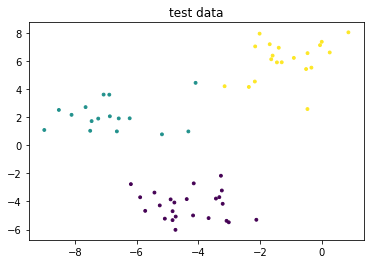

In [50]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

plt.figure()
plt.scatter(x_train[0,:],x_train[1,:],c=y_train,s=8)
plt.title("train data")
plt.figure()
plt.scatter(x_test[0,:],x_test[1,:],c=y_test,s=8)
plt.title("test data")

train_x = np.concatenate([x_train, np.ones((1, x_train.shape[1]))])
print("new shape of train x:{}".format(train_x.shape))

test_x = np.concatenate([x_test, np.ones((1, x_test.shape[1]))])
print("new shape of test x:{}".format(test_x.shape))

train_y = y_train
test_y = y_test

### You should implement the following methods:
* distance: return the Euclidean distance of two vectors
* vote: return the majority labels contained in the given labels array

### some useful functions:
* `np.argsort()` : Returns the indices that would sort an array.
* `np.bincount()` : Count number of occurrences of each value in array of non-negative ints.
* `np.argmax()` : Returns the indices of the maximum values along an axis.

In [51]:
def distance(x1, x2):
    sum=0
    for i in range (x1.shape[0]):
        sum+=(x1[i]-x2[i])**2
    d=sum**1/2
    return d

def vote(labels):
    label=np.argmax(np.bincount(labels))
    return label

def KNN(train_x, train_y, test_x, test_y, K=8):
    test_preds = []
    for i in range(test_x.shape[1]):
        xx = test_x[:,i]
        Dx = np.array([distance(xx, train_x[:,j]) for j in range(train_x.shape[1])])
        idxs = np.argsort(Dx)[:K]
        labels = train_y[idxs]
        test_preds.append(vote(labels))
    return (np.array(test_preds)==test_y).mean()*100

In [52]:
acc = KNN(train_x, train_y, test_x, test_y, K=8)
print("accuracy by KNN: {}".format(acc))

accuracy by KNN: 100.0
